In [117]:
import pandas as pd
import requests
import shutil
from matplotlib import image
from matplotlib import pyplot
from PIL import Image, ImageColor
import numpy as np
import urllib
from sklearn.model_selection import train_test_split
import cv2
from sklearn.cluster import KMeans
from webcolors import rgb_to_name

In [107]:
!pip install webcolors

In [2]:
#!pip install opencv-python

In [3]:
#!pip install extcolors

In [4]:
"""!pip install Pillow==4.0.0
!pip install PIL
!pip install image"""

'!pip install Pillow==4.0.0\n!pip install PIL\n!pip install image'

In [5]:
path = '/Users/anaghabalaji/Desktop/approved_products.csv'

In [6]:
path

'/Users/anaghabalaji/Desktop/approved_products.csv'

In [7]:
df = pd.read_csv(path, names = ['name', 'tags', 'image_url'], skiprows = [0, 1])

In [8]:
df.head()

,name,tags,image_url
0,Pink Bridal Bouquet,{},https://weddings-products.s3.amazonaws.com/pro...
1,Rose Boutonniere,{},https://weddings-products.s3.amazonaws.com/pro...
2,Flower Clusters,{},https://weddings-products.s3.amazonaws.com/pro...
3,Large Flower Cloud,{},https://weddings-products.s3.amazonaws.com/pro...
4,Greenery Bud Vase Trio,{},https://weddings-products.s3.amazonaws.com/pro...


In [9]:
df.columns

Index(['name', 'tags', 'image_url'], dtype='object')

In [10]:
tag = df.loc[10].at['tags']
print(tag)

{meta_priceType_ITEM,meta_stemsRegular_18,meta_stemsGreenery_3,meta_stemsPremium_3,meta_stemsFourDollar_0,color_blush,color_cream,color_green,color_peach,color_white,flower_gardenRose,flower_greenery,flower_ranunculus,style_garden,season_spring,season_summer,season_yearround,occasion_cocktail,occasion_reception,itemType_centerpiece,meta_productCatalogJan2021,meta_productPriced,meta_displayPriceUnit_}


In [11]:
def convert_tag(tag):
    split_tag = tag.split(',')
    intermediate = []
    for item in split_tag:
        removed = item.replace('"', "")
        removed_3 = removed.replace('{', '')
        removed_4 = removed_3.replace('}', '')
        intermediate.append(removed_4)
    return intermediate

In [12]:
df.loc[97].at['image_url']

'https://poppy-customer-content-prod.s3.amazonaws.com/2021/10/05/nf0542288-8271-49f6-9f02-b90052ae5d9b-Greenery-Aisle-Decor.png'

In [13]:
convert_tag(tag)

['meta_priceType_ITEM',
 'meta_stemsRegular_18',
 'meta_stemsGreenery_3',
 'meta_stemsPremium_3',
 'meta_stemsFourDollar_0',
 'color_blush',
 'color_cream',
 'color_green',
 'color_peach',
 'color_white',
 'flower_gardenRose',
 'flower_greenery',
 'flower_ranunculus',
 'style_garden',
 'season_spring',
 'season_summer',
 'season_yearround',
 'occasion_cocktail',
 'occasion_reception',
 'itemType_centerpiece',
 'meta_productCatalogJan2021',
 'meta_productPriced',
 'meta_displayPriceUnit_']

In [14]:
df.axes

[RangeIndex(start=0, stop=378, step=1),
 Index(['name', 'tags', 'image_url'], dtype='object')]

In [15]:
df['tags'] = df['tags'].apply(convert_tag)

In [16]:
df.head(12)

,name,tags,image_url
0,Pink Bridal Bouquet,[],https://weddings-products.s3.amazonaws.com/pro...
1,Rose Boutonniere,[],https://weddings-products.s3.amazonaws.com/pro...
2,Flower Clusters,[],https://weddings-products.s3.amazonaws.com/pro...
3,Large Flower Cloud,[],https://weddings-products.s3.amazonaws.com/pro...
4,Greenery Bud Vase Trio,[],https://weddings-products.s3.amazonaws.com/pro...
5,Baby's Breath Bud Vases,[],https://weddings-products.s3.amazonaws.com/pro...
6,Romantic Centerpiece Round Table Decor,[],https://weddings-products.s3.amazonaws.com/pro...
7,Chair Posies,"[NULL, meta_stemsRegular_0, meta_stemsGreenery...",https://poppy-customer-content-prod.s3.amazona...
8,Blush & Peach Garden Roses Bridesmaid Bouquet,"[meta_priceType_ITEM, meta_stemsRegular_17, me...",https://weddings-products.s3.amazonaws.com/pro...
9,Pink Rose Boutonniere,"[meta_priceType_ITEM, meta_stemsRegular_2, met...",https://weddings-products.s3.amazonaws.com/pro...


In [17]:
tag

'{meta_priceType_ITEM,meta_stemsRegular_18,meta_stemsGreenery_3,meta_stemsPremium_3,meta_stemsFourDollar_0,color_blush,color_cream,color_green,color_peach,color_white,flower_gardenRose,flower_greenery,flower_ranunculus,style_garden,season_spring,season_summer,season_yearround,occasion_cocktail,occasion_reception,itemType_centerpiece,meta_productCatalogJan2021,meta_productPriced,meta_displayPriceUnit_}'

In [18]:
df.loc[13].at['tags']

['meta_priceType_ITEM',
 'meta_stemsRegular_1',
 'meta_stemsGreenery_1',
 'meta_stemsPremium_0',
 'meta_stemsFourDollar_0',
 'color_peach',
 'style_simple',
 'season_yearround',
 'occasion_personals',
 'itemType_bout',
 'meta_productCatalogJan2021',
 'meta_productPriced',
 'meta_displayPriceUnit_']

In [19]:
def get_flowers(index):
    tags = df.loc[index].at['tags']
    flowers = []
    for feature in tags:
        if 'flower_' in feature:
            string2 = feature.replace("flower_", "")
            flowers.append(string2)
    return flowers

In [20]:
get_flowers(13)

[]

In [21]:
flower_col = []
for row in range(len(df)):
    flowers = get_flowers(row)
    flower_col.append(flowers)

In [22]:
len(flower_col)

378

In [23]:
df['flowers'] = flower_col

In [24]:
df.head(12)

,name,tags,image_url,flowers
0,Pink Bridal Bouquet,[],https://weddings-products.s3.amazonaws.com/pro...,[]
1,Rose Boutonniere,[],https://weddings-products.s3.amazonaws.com/pro...,[]
2,Flower Clusters,[],https://weddings-products.s3.amazonaws.com/pro...,[]
3,Large Flower Cloud,[],https://weddings-products.s3.amazonaws.com/pro...,[]
4,Greenery Bud Vase Trio,[],https://weddings-products.s3.amazonaws.com/pro...,[]
5,Baby's Breath Bud Vases,[],https://weddings-products.s3.amazonaws.com/pro...,[]
6,Romantic Centerpiece Round Table Decor,[],https://weddings-products.s3.amazonaws.com/pro...,[]
7,Chair Posies,"[NULL, meta_stemsRegular_0, meta_stemsGreenery...",https://poppy-customer-content-prod.s3.amazona...,[]
8,Blush & Peach Garden Roses Bridesmaid Bouquet,"[meta_priceType_ITEM, meta_stemsRegular_17, me...",https://weddings-products.s3.amazonaws.com/pro...,"[gardenRose, ranunculus]"
9,Pink Rose Boutonniere,"[meta_priceType_ITEM, meta_stemsRegular_2, met...",https://weddings-products.s3.amazonaws.com/pro...,"[greenery, standardRose]"


In [25]:
def get_colors(index):
    tags = df.loc[index].at['tags']
    colors = []
    for feature in tags:
        if 'color' in feature:
            string = feature.replace("color_", "")
            colors.append(string)
    return colors

In [26]:
get_colors(12)

['blush', 'cream', 'green', 'white']

In [27]:
color_col = []
for row in range(len(df)):
    colors = get_colors(row)
    color_col.append(colors)

In [28]:
df['colors'] = color_col

In [29]:
df.loc[97].at['image_url']

'https://poppy-customer-content-prod.s3.amazonaws.com/2021/10/05/nf0542288-8271-49f6-9f02-b90052ae5d9b-Greenery-Aisle-Decor.png'

In [30]:
"""for row in range(len(df)):
    image_url = df.loc[row].at['image_url']
    file_name = '/Users/anaghabalaji/Desktop/flower_images/image-' + str(row) + '.jpg'
    urllib.request.urlretrieve(image_url, file_name)"""

"for row in range(len(df)):\n    image_url = df.loc[row].at['image_url']\n    file_name = '/Users/anaghabalaji/Desktop/flower_images/image-' + str(row) + '.jpg'\n    urllib.request.urlretrieve(image_url, file_name)"

In [31]:
"""image_url = df.loc[377].at['image_url']
file_name = '/Users/anaghabalaji/Desktop/flower_images/image-' + str(377) + '.jpg'
urllib.request.urlretrieve(image_url, file_name)"""

"image_url = df.loc[377].at['image_url']\nfile_name = '/Users/anaghabalaji/Desktop/flower_images/image-' + str(377) + '.jpg'\nurllib.request.urlretrieve(image_url, file_name)"

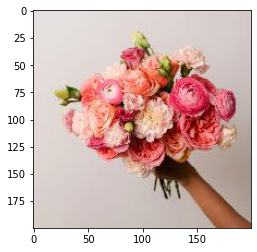

In [32]:
image = Image.open('/Users/anaghabalaji/Desktop/flower_images/image-0.jpg')
pyplot.imshow(image)
pyplot.show()

In [33]:
img = Image.open('/Users/anaghabalaji/Desktop/flower_images/image-4.jpg')
print('original size: ', img.size)
img = img.resize([200, 200])

original size:  (200, 200)


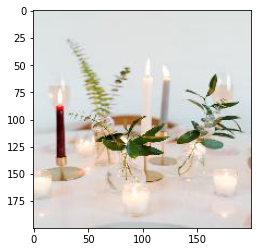

In [34]:
#img_path = img.save('/Users/anaghabalaji/Desktop/flower_images/resize-1.jpg')
pyplot.imshow(img)
pyplot.show()

In [35]:
import os

_, _, files = next(os.walk('/Users/anaghabalaji/Desktop/flower_images/'))
file_count = len(files)
print(file_count)

380


In [36]:
"""for i in range(file_count):
    try: 
        img = Image.open('/Users/anaghabalaji/Desktop/flower_images/image-' + str(i) + '.jpg')
        img = img.resize([200, 200])
        rgb = img.convert('RGB')
        img_path = rgb.save('/Users/anaghabalaji/Desktop/flower_images/image-' + str(i) + '.jpg')
    except:
        print('Error occured on ', str(i), 'th image')"""

"for i in range(file_count):\n    try: \n        img = Image.open('/Users/anaghabalaji/Desktop/flower_images/image-' + str(i) + '.jpg')\n        img = img.resize([200, 200])\n        rgb = img.convert('RGB')\n        img_path = rgb.save('/Users/anaghabalaji/Desktop/flower_images/image-' + str(i) + '.jpg')\n    except:\n        print('Error occured on ', str(i), 'th image')"

In [37]:
img = Image.open('/Users/anaghabalaji/Desktop/flower_images/image-1.jpg')
array = np.asarray(img)

In [38]:
array_data = []
for i in range(1, file_count - 1):
    if i != 97:
        img = Image.open('/Users/anaghabalaji/Desktop/flower_images/image-' + str(i) + '.jpg')
        array = np.asarray(img)
        array_data.append(array)

In [39]:
array_data = np.asarray(array_data)

/var/folders/sc/g0x9kgp11qv7yvdsbkhqm9tr0000gn/T/ipykernel_84104/1319265687.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array_data = np.asarray(array_data)


In [40]:
type(array_data)

numpy.ndarray

In [41]:
array_data.shape

(377,)

In [42]:
train_data, test_data = train_test_split(array_data, test_size = .20, 
                                         train_size = .80, shuffle = True)

In [43]:
len(train_data)

301

In [44]:
len(test_data)

76

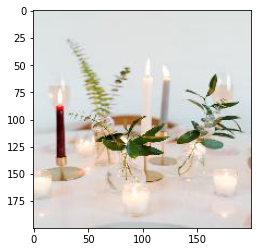

In [45]:
img = Image.open('/Users/anaghabalaji/Desktop/flower_images/image-4.jpg')
pyplot.imshow(img)
pyplot.show()

In [46]:
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x143A64AF0>


In [47]:
get_colors(15)

['cream', 'green', 'white']

In [48]:
print(colors)

[]


In [49]:
def euclidDist(color_1, color_2):
    sum = 0
    red_diff = color_2[0] - color_1[0]
    green_diff = color_2[1] - color_1[1]
    blue_diff = color_2[2] - color_1[2]
    sum = (red_diff**2) + (green_diff**2) + (blue_diff**2)
    return sum

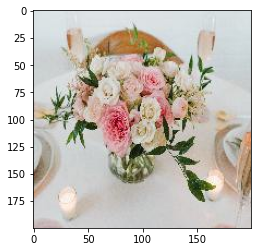

In [50]:
img = cv2.imread('/Users/anaghabalaji/Desktop/flower_images/image-45.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
pyplot.imshow(img)
pyplot.show()
img=img.reshape((img.shape[1]*img.shape[0],3))

In [51]:
kmeans=KMeans(n_clusters=5)
s=kmeans.fit(img)

In [52]:
labels=kmeans.labels_
print(labels)
labels=list(labels)

[2 2 2 ... 2 2 2]


In [53]:
centroid=kmeans.cluster_centers_
print(centroid)

[[201.14579404 189.56007167 179.38240287]
 [ 60.98512035  62.09365427  31.55317287]
 [211.39719056 213.49594487 212.93426981]
 [181.92508989 154.38513783 134.95685178]
 [143.89166667 113.61296296  78.74722222]]


In [54]:
percent=[]
for i in range(len(centroid)):
  j=labels.count(i)
  j=j/(len(labels))
  percent.append(j)
print(percent)

[0.2653, 0.05695, 0.471625, 0.125125, 0.081]


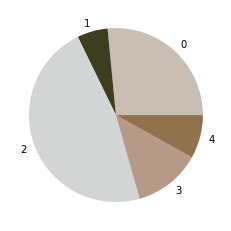

In [55]:
pyplot.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))
pyplot.show()

In [56]:
get_colors(12)

['blush', 'cream', 'green', 'white']

In [57]:
def get_pie_chart(index):
    img = cv2.imread('/Users/anaghabalaji/Desktop/flower_images/image-' + str(index) + '.jpg')
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    pyplot.imshow(img)
    pyplot.show()
    img=img.reshape((img.shape[1]*img.shape[0],3))
    kmeans=KMeans(n_clusters=10)
    s=kmeans.fit(img)
    labels=kmeans.labels_
    labels=list(labels)
    centroid=kmeans.cluster_centers_
    percent=[]
    for i in range(len(centroid)):
      j=labels.count(i)
      j=j/(len(labels))
      percent.append(j)
    print(percent)
    pyplot.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))
    pyplot.show()
    print('Colors from dataframe: ')
    print(get_colors(index))

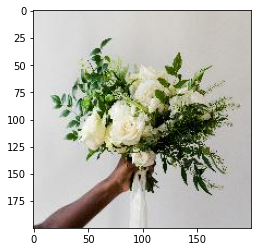

[0.052525, 0.0393, 0.036175, 0.04225, 0.267425, 0.218, 0.056475, 0.03815, 0.04995, 0.19975]


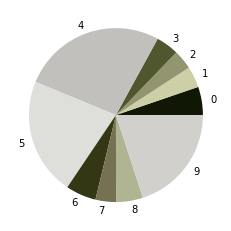

Colors from dataframe: 
['cream', 'green', 'white']


In [58]:
get_pie_chart(15)

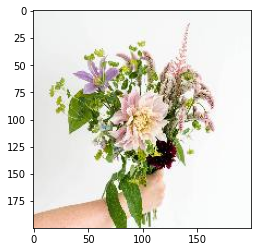

[0.477, 0.04455, 0.059575, 0.017575, 0.069125, 0.0431, 0.04385, 0.0243, 0.1899, 0.031025]


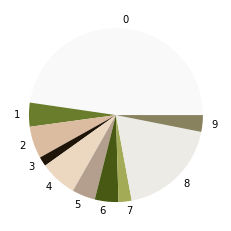

Colors from dataframe: 
['blue', 'blush', 'burgundy', 'cream', 'green', 'lavender', 'pink', 'purple', 'style_colorful']


In [59]:
get_pie_chart(31)

In [143]:
def bounding_rect(index):
    image = cv2.imread('/Users/anaghabalaji/Desktop/flower_images/image-' + str(index) + '.jpg')
    original = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    ROI_number = 0
    cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    max_w = 0
    max_h = 0
    x_save = 0
    y_save = 0
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        if (w * h) > (max_h * max_w):
            max_w = w
            max_h = h
            x_save = x
            y_save = y
    cv2.rectangle(image, (x_save, y_save), (x_save + max_w, y_save + max_h), (0,0,255), 2)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    specs = [x_save, y_save, max_w, max_h]
    pyplot.imshow(image)
    pyplot.show()
    return specs

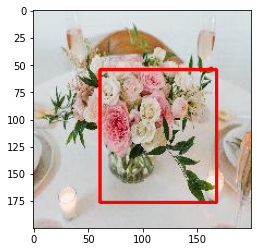

[61, 54, 107, 122]

In [144]:
bounding_rect(45)

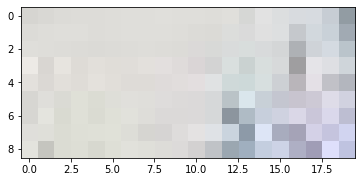

In [145]:
img = cv2.imread('/Users/anaghabalaji/Desktop/flower_images/image-45.jpg')
crop = img[61:70, 20:40]
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
pyplot.imshow(crop)
pyplot.show()

In [167]:
def crop_image(index, x, y, w, h):
    img = cv2.imread('/Users/anaghabalaji/Desktop/flower_images/image-' + str(index) + '.jpg')
    crop = img[y:y+h, x:x+w]
    crop=cv2.cvtColor(crop,cv2.COLOR_BGR2RGB)
    return crop

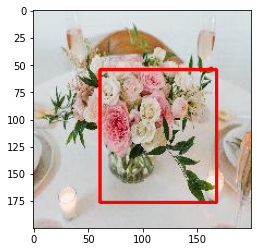

In [168]:
x, y, w, h = bounding_rect(45)
crop = crop_image(45, x, y, w, h)

In [169]:
def get_pie_chart(index):
    img = cv2.imread('/Users/anaghabalaji/Desktop/flower_images/image-' + str(index) + '.jpg')
    x, y, w, h = bounding_rect(index)
    print(x, y, w, h)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = crop_image(index, x, y, w, h)
    pyplot.imshow(img)
    pyplot.show()
    img=img.reshape((img.shape[1]*img.shape[0],3))
    kmeans=KMeans(n_clusters=15)
    s=kmeans.fit(img)
    labels=kmeans.labels_
    labels=list(labels)
    centroid=kmeans.cluster_centers_
    percent=[]
    for i in range(len(centroid)):
      j=labels.count(i)
      j=j/(len(labels))
      percent.append(j)
    pyplot.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))
    pyplot.show()
    print('Colors from dataframe: ')
    colors_webcolors = []
    print(get_colors(index))
    print('Colors from image: ')
    centroid = centroid.tolist()
    for color in centroid:
        color_name = get_color_name(color)
        colors_webcolors.append(color_name)
    print(colors_webcolors)

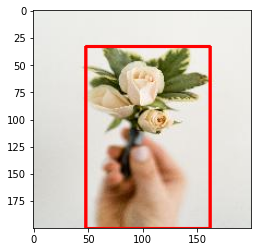

48 33 114 167


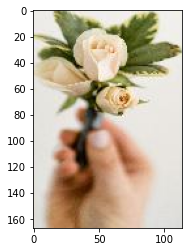

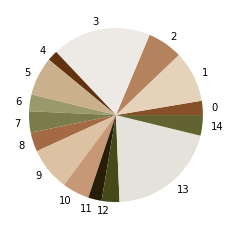

Colors from dataframe: 
['blush', 'cream', 'green']
Colors from image: 
['saddlebrown', 'wheat', 'peru', 'linen', 'saddlebrown', 'tan', 'gray', 'dimgray', 'sienna', 'tan', 'rosybrown', 'black', 'darkolivegreen', 'gainsboro', 'darkolivegreen']


In [171]:
get_pie_chart(39)

In [140]:
def get_color_name(rgb_triplet):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - rgb_triplet[0]) ** 2
        gd = (g_c - rgb_triplet[1]) ** 2
        bd = (b_c - rgb_triplet[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]